# Sediment Layered Vertically in Advection (SYLVIA v 1.0) Algorithm Development & Testbed for Output

 ## Technical Documentation 

**Impact Statement**
1.	With limited data available for total suspended solids (TSS) within aquatic ecosystems, driven by land use changes and climate variability, the need for predictive sedimentation modeling in aquatic ecosystems is critical. SYLVIA v1.0, is a sedimentation model within the US EPA Hydrologic Micro Services (HMS), used to build user-defined workflows for decision support systems and comprehensive surface water modeling within the United States. The sedimentation model is a predictive tool which provides estimates for TSS  using hydrodynamic characteristics of stream reaches using user-defined sediment parametrization to reflect the settling, resuspension and deposition processes in the water column. With HMS, users are enabled with an abundance of environmental datasets and models to develop idealistic boundary conditions for predictive modeling of stream networks for assessing water quality and water quantity.  

2.	Meeting Info (name and url if there is one)
American Water Resource Association, 2020 Annual Water Resources Conference

https://www.awra.org/Members/Events_and_Education/Events/2020_Annual_Conference_Call_for_Abstracts.aspx

3.	Keywords
Water quality, water quantity, sediment model, NHDPlus V2, HMS, COMID, settling, resuspension, deposition



## **Abstract**

Hydrologic Micro Services (HMS) sediment module using the Sediment Yield’s Layered Vertically in Advection (SYLVIA v1.0) algorithm
Kar’retta Venable $^a$, Chris Knightes $^b$, John M. Johnston $^c$, Rajbir Parmar $^c$, Kurt Wolfe $^c$

$^a$ Oak Ridge Institute for Science Education (ORISE), U.S. Environmental Protection Agency (USEPA), Office of Research and Development, Center for Environmental Measurement and Modeling, Environmental Processes Division, Landscape and Aquatic Systems Modeling Branch, 960 College Station Road, Athens, GA 30605, USA, E-mail:  venable.karretta@epa.gov

$^b$ USEPA Center for Environmental Measurement and Modeling, 27 Tarzwell Drive, Narragansett, RI 02882, USA, email: knightes.chris@epa.gov

$^c$ USEPA Center for Environmental Measurement and Modeling, 960 College Station Road, Athens, GA 30605, USA, email: johnston.johnm@epa.gov

	 
   Towards the goal of creating a comprehensive water quality/quantity system of reusable and inter-operable modeling components, the USEPA developed Hydrologic Micro Services (HMS - https://qed.epacdx.net/hms/). HMS is a series of microservice data provisioning and hydrologic processes used to build workflows for  decision support systems and provide comprehensive surface water modeling within the United States.  When conducting a modeling exercise, users identify which modules will be utilized to form a workflow specific to their prediction/forecast needs. HMS outputs include flow and water quality variables associated with nutrient and sediment dynamics of aquatic ecosystems at enhanced spatial and temporal resolution of predictions/forecasts. With limited available data for total suspended sediment (TSS), modeling particle advection and settling dynamics is essential for developing total maximum daily loads (TMDLs) and biotic solids production which serve as eutrophication agents in aquatic ecosystems.   
	
   The SYLVIA v1.0  module within HMS provides the location, concentration, and mass loadings for TSS introduced into a NHDPlus V2 stream segment (COMID) network. NHDPlus V2 is a national, medium resolution stream and river data product maintained by the EPA Office of Water (https://www.epa.gov/waterdata/nhdplus-national-hydrography-dataset-plus). Model initialization is performed through data acquisition from the HMS workflow beginning with importing hourly  streamflow, stream velocity, and average depth for the COMIDs selected within the network domain. Additionally, users provide conditional descriptive and processed based particle characteristics capturing settling, resuspension, and depositional processes.  These regimes are implemented with an iterative mass balance advective transport approach. SYLVIA is a vertically-stratified, three-layer water column model, where the bottom layer represents the surface benthic layer. Here, we present a technical demonstration of the underlying algorithms, the user defined state variables, and a representative case study analysis. 


## State Variables

https://usepa-my.sharepoint.com/personal/venable_karretta_epa_gov/_layouts/OneNote.aspx?id=%2Fpersonal%2Fvenable_karretta_epa_gov%2FDocuments%2FKarretta%20%40%20Environmental%20Protection%20Agency%20%28EPA%29&wd=target%28Research%20Activities.one%7C63728977-CD6F-42EF-AC8B-1DF233E68C7F%2FNaming%20acronyms%20and%20Abbreviations%7CD37C873E-68A2-45C8-9ACD-42A2CFF93D31%2F%29
onenote:https://usepa-my.sharepoint.com/personal/venable_karretta_epa_gov/Documents/Karretta%20@%20Environmental%20Protection%20Agency%20(EPA)/Research%20Activities.one#Naming%20acronyms%20and%20Abbreviations&section-id={63728977-CD6F-42EF-AC8B-1DF233E68C7F}&page-id={D37C873E-68A2-45C8-9ACD-42A2CFF93D31}&end

## Model Initiation of State Variables
The water characteristics derived from known user inputs and reach level COMID information where hourly discharge and streamflow velocity are obtained from NHDPlus V.2 data to calculate the cross-sectiononal area and displacement per second and hour and calcualted for the TSS. (This will be turned into an API to delvier an array with a name derived from the COMIDs collected with and automatic calculation for water characteristics and time of travel )  

**From upswaterchar.f95**

Print *, "Enter water depth ($m$), median diameter size ($m$) and length ($m$)"
   
   read(5, *) h, da, lc

Print *, "Enter your water discharge ($\frac{m ^ 3}{s}$) and water velocity ($ \frac {m}{s}$)"
   
   read(5, *) Q, u  

Since stream hourly discharge, $Q$($\frac{m ^3}{s}$),  can be defined as 

$$Q = A* \bar{u} $$

Where u is the mean hourly stream velocity ($ \frac {m}{s}$) and $A$ is the cross-sectional area. Therefore, the cross-sectional area is

$$A = \frac{Q}{\bar{u}}$$


With the assumption that the displacement in 1 sec ($m$):

$$ dx = \bar {u} * 1 sec $$

and the displacement in 1 day (86400s) ($m$) 

$$dx_1= \bar {u} * 86400 sec $$
      
Furthermore 

${\bar{u}}$, the mean hourly stream velocity is, 

$${\bar{u}} = \frac{dx}{\delta{t}}$$ ,  

where ${dx}$ is the displacement ($m$) between the elapsed time increment ${\delta{t}}$ is represented through the time iteration represented by ${\delta{j}}$. For simplicity and to opitimize scaling of the SYLVIA, it is assumed that 1 second intervals will be used to model TSS within the confined system. Therefore, we can assume that $j$ represents 1 second time interval which iterates to the run time maximum($rtc$) denoted by the users constraints. For model time increments to initialize, the advective time step is represented by $t=j-1$, where $j = 1$, therefore $t = 0$. 


With this iteration, use of the particle displacement, ($pdx$) in ($m$) within the single step iteration is denoted by

$$pdx = ({\bar{u}} * (j-1))$$, 

providing the horizatonal advective forcing within the model. Therefore when $t = 1$ , 

$$pdx = dx $$ , thus 

$$pdx = {\bar{u}} * {\delta{t}}$$,

unitl the limit of $rtc$ where ${\delta{t}}$ is given in 1 second increments $tinc$ from $0 \to rtc$ .


Additionally, the maximum time of travel ($tmx$) within each COMID reach is then caluclated based upon the channel length ($lc$) and the indicated mean streamflow velocity by, 

$$tmx = \frac {lc}{\bar{u}}$$, 

and the maximum time of travel in 1 hour for current COMID ($tmxc$) is defined by, 

$$tmxc = \frac {tmx}{3600}$$ and is also scaled for daily analysis as well of sediment loads.  



User define the type of TSS which is deposited through choosing the particle type and a density ($g/cm^3$) and its diameter size ($m$) will be entered through a series from an iterative loop based on the number of solids entered. The density in the system will remain constant for each of the solids within the system. (from upsgransize.f95 and subroutine grainsz)

* Organic Matter (om=1.270)   
* Siliceous Minerals (sm=2.650)
* Garnett Sands (gs=4.000)
* Enter density  
where, 
$$\rho_s = density (g/cm^3)$$

$$and$$ 

$$ds = grain size (m)$$

and designates which layer is the particle is within where the settling velocities are calculated based upon (from upslocation.f95) - fig(1): 

* Top of Water Column (1) 
* Bottom of Water Column (2) 
* Surface Benthic Layer (3) 



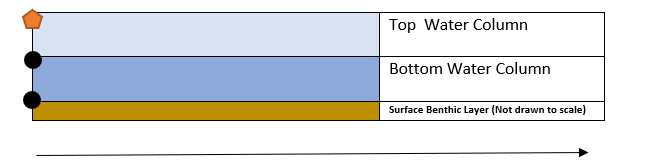

Fig (1) Model design for Sylvia v 1.0. This initation has used a garnet sand in the top layer and organic matter in the bottom water column layer and the surface benthic layer starting at the top of the layer depth.

From the depth ($h$) in ($m$) entered of the channel, maximum layer depths ($dlayer$) are calculated for each layer and the maximum benthic layer depth ($maxlyrd_b$) where:

$$dlayer = \frac {h}{ns-1}$$
where $ns = number of layers$ (3, parameter declaration) ,
used for an inequality switch to check vertical displacement ($pdy$) depth of active layers) and

$$maxlyrd_b=h+ 0.1 $$, to provide the maximum depth of pressurized burial prior to accumulation growth in the benthic layer (~10 cm = .1m based on WASP8 documentation)

For normalization of the streamflowm, $q$, in each layer for equal partioning of the discharge for total initial amount of TSS for each layer the, volume of water in each segment is designated as, $svol$, where: 

$$svol_w = \frac {q}{dlayer}$$

Since density, $\rho_s (\frac {g}{mL})$, therefore its derivation is 

$$\rho_s = \frac {mass (g)} {volume (mL)}$$, 

where $1 mL =  1 cm^3$. With constant $\rho_s$, furthermore, we can deduced that inherant mass for each object is equivalent to 

$M_i$ for each layer's inital mass calulation, where the total mass in the system $M_T$, 

$$M_T = \Sigma {m_i} $$

and the total sediment density is $tot_\rho$, 

$$tot_\rho = \Sigma {\rho_s},$$ 

where the total sediment volume in the system $tot_v$, 

$$tot_v = \frac {M_T}{tot_\rho}.$$


Maximum Time of Travel (tmx) for time step iteration
$$tmx = \frac {lc}{u}$$

Maximum Time of Travel in 1 hour for current COMID (tmxc)
$$tmxc = \frac {tmx}{3600}$$

In order to calculate benthic state variables, the bulk denisty $\rho_b$ and percent water $PCTWA$, are needed. 

$$\rho_b = \rho_w * n +\rho_d$$, 

where $n$ is the porosity of water, $\rho_w$, is the density of water, and  $\rho_d$ is the dry sediment weight is 

$$\rho_d = \rho_s *(1-n)$$, 

and $PCTWA$ is denoted by 

$$PCTWA = 100*(1+ \frac{n}{\rho_s}).$$


### Settling Velocity and Deposition
Settling velocity $(sv)$ parameterization is a key to accurately defining sedimentation within river systems. With the use of settling velocities, calculation of the total settling flux $(tsf$) within each layer, are evaluated through quantification the settling fluxes $sf \frac {g}{m^2 s}$ and the resusupension $rsf \frac {g}{m^2 s}$. Calcuation of each of the settling flux, is dependent of the user's defined $sv$ algorithm through the selection of three different algorithms inclusive of 1) a user defined (legacy) $sv$ adn $rsv$, 2) the descriptive, which uses Stoke's $sv$ calculations inclusive of the kinematic viscosity of water parameter, $\mu$, and the particle diameter size $\rho_s$, and 3) the Van Rajin method (Wool, WAPS8) using processed based solids transport utilizing shear stress and the solids particle's size and density characteristics. In each instance, settling velocities are equivalent to the depositional flux. 

#### Legacy  and base formulas
$$sf = sv \times \rho_s$$

$$rsf = sv \times \rho_s$$,


The $rsf$ can be set for each solid, but must not exceed the $sf$ calculated within each layer. 

$$bf = w_b \times \rho_b,$$ 

where $wb$ is the buiral velocity of the benthic layer and provides a default as 1 hour for burial rate, but can be change by the user is, 

$$w_b = \frac {db}{dtb} \times 3600$$

and the $tsf$ for the benthic layer is designated as,

$$tsf=(bf-(rsf \times 3600))$$


thus the $tsf$ is the difference between the $sf$ and $rsf$ for each layer from the settling characteristics.

$$tsf = sf - rsf$$

#### Descriptive 

$$sf = \frac {86400 \times g}{18 \times\mu} \times (\rho_s - \rho_w) \times d_s  (\frac {g}{m^2 day})$$, where $\mu$ is 0.001 $\frac{kg}{ms}$ and $g$ is the acceleration due to gravity with a value of $9.81 \frac {g}{m^2 s}$



#### Settling flux, mass, and concentration initalizaition 
Since the flux is advecting across a certain surface area, we can assume that through the scalling of the area for the initalization COMID against the $tsf$, with the assumption assumption of a 1 day $\delta t$, we can infer that mass $M_i$ (L for layer number) of the given layer(i). 

$$M_i (g) = tsf \times A\times 1 day$$ 

This value can be scalled accordingly to provide any time increment, however, for puporses of downscalling results, all values of time are changed over to seconds for each layer. To determine the depth for each of solid, $pdy$, the particle displacement in the y-direction, is calculated from use of the $tsf$ divided by the solids density $\rho_s$ and use of the scalling time increment $\delta  t$


Additionally, we can futher explore the rate at which the solids are settling within in each layer scaled to occur in 1 second intervals is denoted as the total settling velocity $tsv \frac{m}{s}$ as 

$$tsv = \frac {tsf}{\rho_s}.$$

Through incorporation of the time iteration $j$ and the $dlayer$ we can dervive the vertical particle displacement as

$$pdy = y_0 + tsv_i \times j.$$

Furthermore, in respect to layer depth $dlayer$, $y_0$ becomes, 

$$y_0 =maxlyrd_i - dlayer$$


From the inital mass calculation for each layer, we can also deduce two major state variables, the concentration $C_i$ within  the layer as 

$$C_i = \frac {M_i}{svol_w}.$$

#### Advection 

Since the advective diffusion mass balance transport equation  the change in concentration of the solid $\frac {\delta C_i}{\delta t}$, suggests that 

$$\frac {\delta C_i}{\delta t} = -\bar u_x\frac {\delta C_i}{\delta x} + D\frac {\delta^2 C_i}{\delta x^2}$$

where the first term of the second order PDE is advection term determined $u_x$ and the second term in the diffusion/dispersion term. SYVLIA v1.0 will only focus on the advection term. Therefore implying the mass flux per layer $\frac {\delta M_i}{\delta t}$ as  

$$\frac {\delta M_i}{\delta t}  = -\bar u_x\frac {\delta M_i}{dx}.$$


To account for the loss of mass in the system, a summation of the loss during each iteration slice $j \to j(rtm)$ is done within an empty 1-D array. Where 

$$\frac {\delta M_i}{\delta t} = M_o -\Sigma({\frac {\delta M_i}{dx} \times pdx})$$

In initation, $pdx$ and $pdy$ are initalized at zero when j=1. 


int_con(1:3) = (/tmx, dx, dx_1/) 
write(10,*)"Your initial", comid,  "and max time of travel and displacement(per day and per sec) is=", int_con




"Would you like to choose (1) User Defined Legacy (2) Descriptive, (3) Van Rijn"
read (5,*) so


## Output Results